# Exploratory Data Anaylsis of Haberman Cancer Survival Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data from CSV file using Pandas Read CSV Function

In [3]:
# downlaod haberman.csv from
# https://www.kaggle.com/gilsousa/habermans-survival-data-set

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [4]:
#  how many data-points and features?
print(haberman.shape)

(305, 4)


In [5]:
# What are the column names in our dataset?
print (haberman.columns)
haberman.head()

Index(['30', '64', '1', '1.1'], dtype='object')


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1



**Observation(s):**
1.  Data contains values and columns name are missing in the dataset.
2. Need to add column data in dataset.
3. Column names can be found in column metadata tab in Kaggle.


In [6]:
#Adding headers to the columns in the data set.
haberman.columns = ["Age","Operation_Year","positive_lymph_nodes","Survival status"]
print (haberman.columns)
haberman.head()

Index(['Age', 'Operation_Year', 'positive_lymph_nodes', 'Survival status'], dtype='object')


,Age,Operation_Year,positive_lymph_nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Observation**:      
        1. First column shows about Age of the patient.
        2. Second column shows about Operation_year i.e people operated in the year 19XX (inbetween 1958 to 1970).
        3. Third column shows about number of positive_lymph_nodes(the nodes which are responsible for cancer) i.e number of tumors found.
        4. Fourth column shows about Survival status of person after operation
            1 - Shows about the person survived 5 years or longer.
            2-  Shows about the person died in less than 5 years.

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                     305 non-null int64
Operation_Year          305 non-null int64
positive_lymph_nodes    305 non-null int64
Survival status         305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**Observation**:
        1. Shape of data is 306 rows and 4 columns
        2. Columns are Age, Operation_year,positive_lymph_nodes,Survival status
        3. From information of data,all elements are non-null and int values

In [7]:
# how many patients survived over 5 years and more and how many died within 5years?
haberman["Survival status"].value_counts()

1    224
2     81
Name: Survival status, dtype: int64

**Observation**:
        1. Following dataset is an unbalanced dataset 
        2. Out of 306 operation performed-
                  225 people lived more than 5 years and
                  81 people died less than 5 years.

In [8]:
haberman.describe()

,Age,Operation_Year,positive_lymph_nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observation**:
    1. The Age of the patients vary from 30 to 83 with the median of 52.
    2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

## Objective:
**To predict whether a patient will survive after 5 years or not based upon the patient's age,his/her operation_year and the number of positive lymph nodes.**

## BI-VARIATE ANALYSIS

## 2-D Scatter Plot

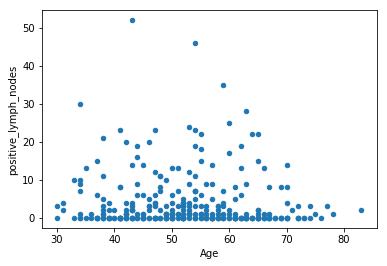

In [9]:
# lets plot plain scatter plot considering age and axillary nodes
haberman.plot(kind='scatter', x='Age', y='positive_lymph_nodes') ;
plt.show()

**Observation:** 
    Most of the people have zero positive lymph nodes.

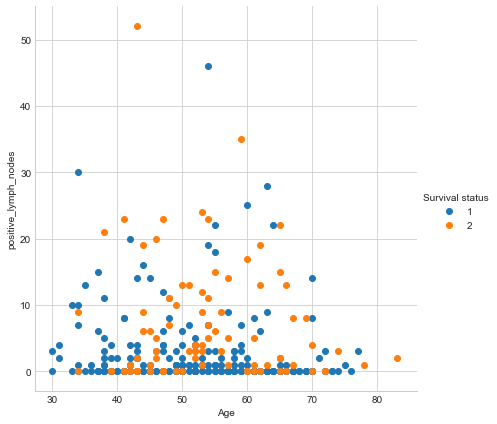

In [10]:
# 2-D Scatter plot with color-coding for each survival status type/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=6) \
   .map(plt.scatter, "Age", "positive_lymph_nodes") \
   .add_legend();
plt.show();

**Observations:**
1. It seems most of the patients have 0 positive lypmh nodes detected.
2. Here we clearly see that blue points are not seperated from orange points.
3. So, by looking this 2-D scatter plot between 'Age' and 'positive_lymph_nodes' we cannot make any decision regarding patient's survival.
4. Therefore, we have to check all combination/pair of features to make good classification/decision.
5. Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Survival')
6. Now, for these combination to analyse,Pair-Plot concept is used.

## Pair Plot

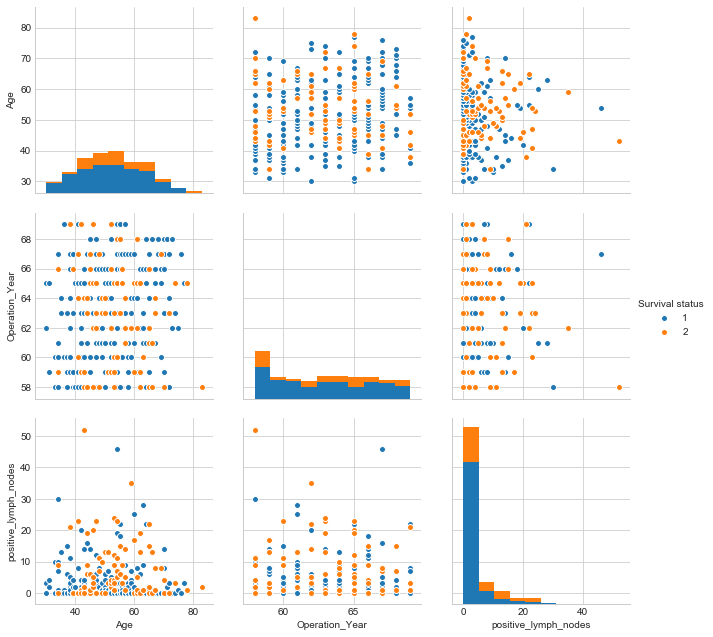

In [11]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival status",
             vars=['Age','Operation_Year','positive_lymph_nodes'], size=3)
plt.show()
# The diagnol elements are PDFs for each feature.

**Observations:**
1. positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 postive lymph nodes detected.
2. It looks like we cannot distinguish the data easily with the help of above scalar plots as most of them are overlapping.

## UNIVARIATE ANALYSIS

## Histogram, PDF

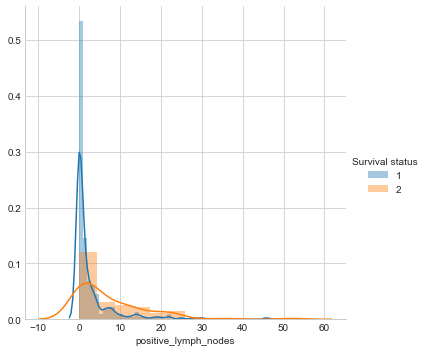

In [12]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "positive_lymph_nodes") \
   .add_legend();
plt.show();


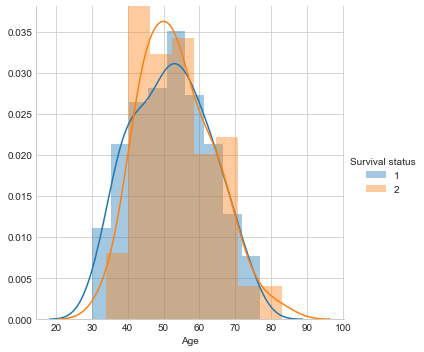

In [13]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

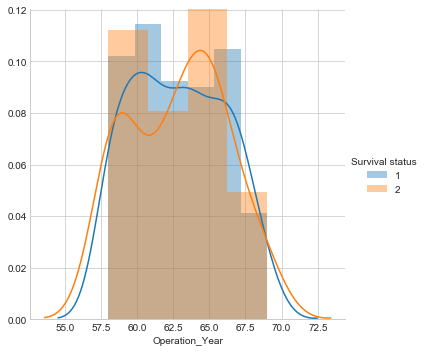

In [14]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.show();

**Observation:**
1. From the above PDFs(Univariate analysis) both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.

2. positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.

3. From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965

## CDF

In [7]:
#divide the data set in two according to the label Survival status 
# alive means status=1 and dead means status =2
alive=haberman.loc[haberman["Survival status"]==1]
dead=haberman.loc[haberman["Survival status"]==2]

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


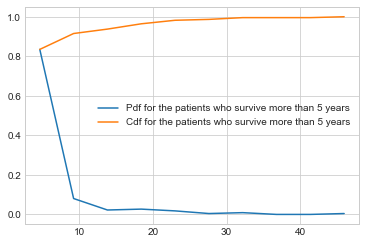

In [16]:
counts, bin_edges = np.histogram(alive['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


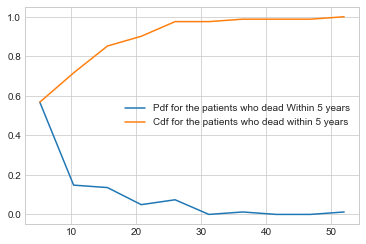

In [17]:
counts, bin_edges = np.histogram(dead['positive_lymph_nodes'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years',
            'Cdf for the patients who dead within 5 years'])
plt.show()

In [18]:
#performing summary statistics below to get an idea to distinguish between the survival and not survival.

## Mean, Variance and Std-dev

In [19]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
alive.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,Age,Operation_Year,positive_lymph_nodes,Survival status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [20]:
print("Summary Statistics of Patients who are dead within 5 years:")
dead.describe()

Summary Statistics of Patients who are dead within 5 years:


,Age,Operation_Year,positive_lymph_nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


**Observations:**
1. From both the tables we can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.

2. The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years

3. From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived.

## Median, Percentile, Quantile, IQR, MAD

In [21]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive["positive_lymph_nodes"]))
#Median with an outlier
print(np.median(np.append(alive["positive_lymph_nodes"],50)));
print(np.median(dead["positive_lymph_nodes"]))

print("\nQuantiles:")
print(np.percentile(alive["positive_lymph_nodes"],np.arange(0, 100, 25)))
print(np.percentile(dead["positive_lymph_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["positive_lymph_nodes"],90))
print(np.percentile(dead["positive_lymph_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["positive_lymph_nodes"]))
print(robust.mad(dead["positive_lymph_nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


## Box plot and Whiskers

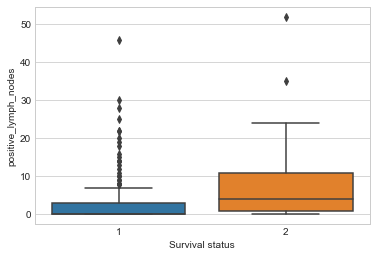

In [22]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""

sns.boxplot(x='Survival status',y='positive_lymph_nodes', data=haberman)
plt.show()

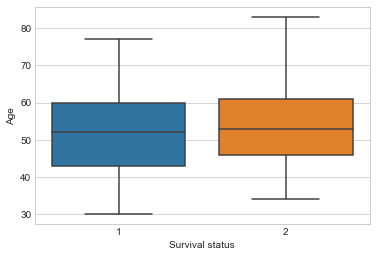

In [23]:
sns.boxplot(x='Survival status',y='Age', data=haberman)
plt.show()

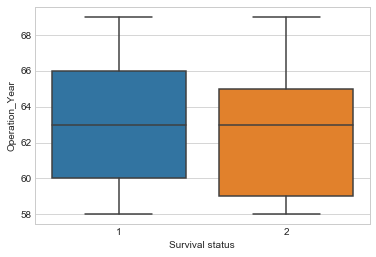

In [24]:
sns.boxplot(x='Survival status',y='Operation_Year', data=haberman)
plt.show()

## Violin plots

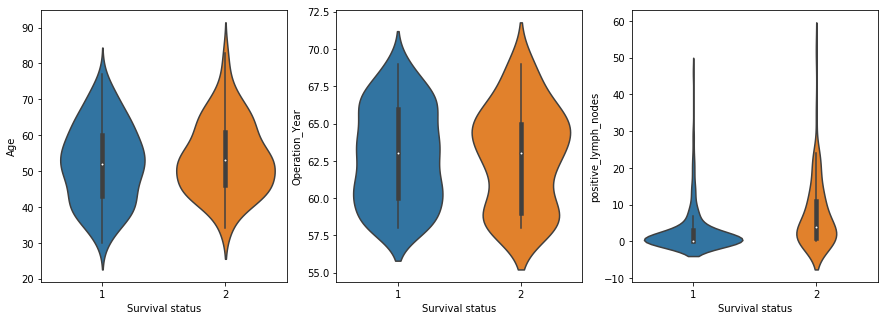

In [8]:
#Violin plot is the combination of box plot and probability density function.
#Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(axes)
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='Survival status', y=feature, data=haberman, ax=axes[idx])
plt.show()

**Observation:**
1. The number of positive lymph nodes of the survivors is highly densed from 0 to 5. 
2. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
3. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

## Contour plot

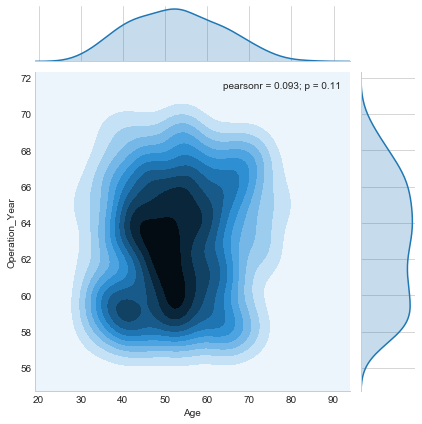

In [26]:
sns.jointplot(x="Age", y="Operation_Year", data=haberman, kind="kde");
plt.show()

**Observation:**
There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.

## Conclusions:
1. There are 306 observations with 4 features in the data set.
2. It is an imbalanced dataset with-
                  a. 225 patients belonging to status 1, those who survived for 5 years and longer and
                  b. 81 patients belonging to status 2, those who survived for less than 5 years.
3. Using scatter plot(Bi-variate analysis) -
                  a. Most of the people have zero positive_lymph_nodes.
                  b. We cannot distinguish between the people who survived and who didn't survive.
4. Using Pair-plot concept(Bi-variate analysis)-
                  a. positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 postive lymph nodes detected.
                  b. Age and Operation_Year have overlapping curves which makes difficult for classifying the survival status.
                  c. but we cannot distinguish the data easily with the help of these plots as most of them are overlapping.                          
5. Using PDFs(Uni-variate Analysis)-
                  a.  both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.
                  b. positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.
                  c. More number of people are not survived in year of operation of 1965.
6. Using CDFs(Uni-variate analysis)-
                  a. We can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.
                  b. We can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived over 5 years.
5. The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years. 
6. Mean age of patients who survived is 52 years and who didn't survive is 54 years.
7. Using Box plot and Violin plots-
                  a. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
                  b. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
                  c. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66. 
8. Using Contour plot-        
                  a. There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.

**Done and Submitted by-**

**BETHU SAI SAMPATH**

**B.Tech CSE,7th Sem, IIT(ISM) Dhanbad**

**Phone number: 9951085648**

                                                                                                           Thank You